In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv("/content/retail_store_inventory.csv")

In [2]:
print(df.info())
print()
print(df.describe())
print()
print(df.isnull().sum())
print()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,01-01-2022,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,01-01-2022,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,01-01-2022,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,01-01-2022,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,01-01-2022,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


/tmp/ipython-input-649828736.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette='viridis')
/tmp/ipython-input-649828736.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette='magma')


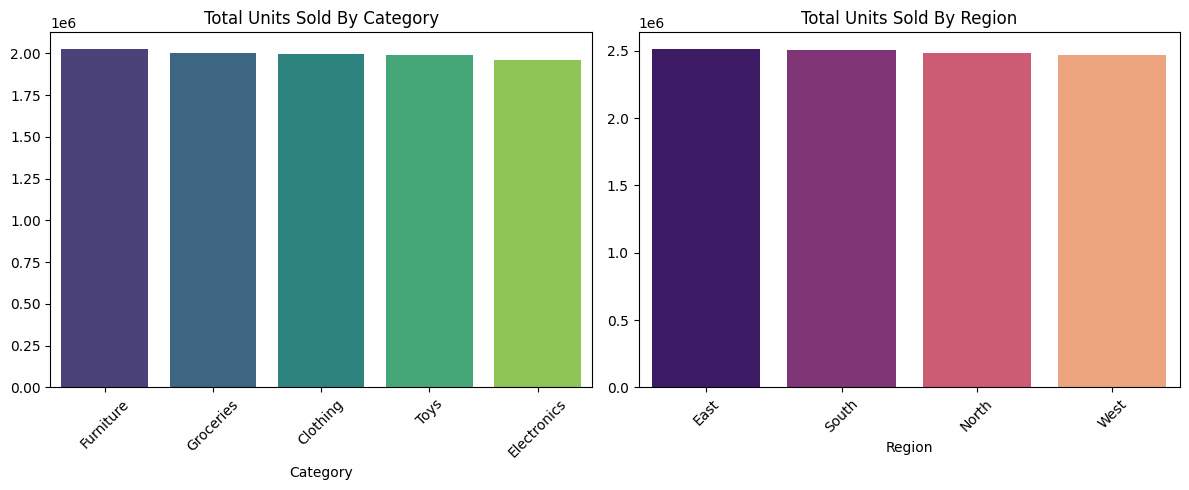

In [3]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

category_sales = df.groupby('Category')['Units Sold'].sum().sort_values(ascending=False)
region_sales = df.groupby('Region')['Units Sold'].sum().sort_values(ascending=False)

#visualization according to Category and Region
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x=category_sales.index, y=category_sales.values, palette='viridis')
plt.title('Total Units Sold By Category')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.barplot(x=region_sales.index, y=region_sales.values, palette='magma')
plt.title('Total Units Sold By Region')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('category_region_sales.png')

Features selected: ['Inventory Level', 'Units Ordered', 'Demand Forecast', 'Price', 'Discount', 'Holiday/Promotion', 'Competitor Pricing', 'Month', 'DayOfWeek', 'Year', 'Category_Electronics', 'Category_Furniture', 'Category_Groceries', 'Category_Toys', 'Region_North', 'Region_South', 'Region_West', 'Weather Condition_Rainy', 'Weather Condition_Snowy', 'Weather Condition_Sunny', 'Seasonality_Spring', 'Seasonality_Summer', 'Seasonality_Winter']


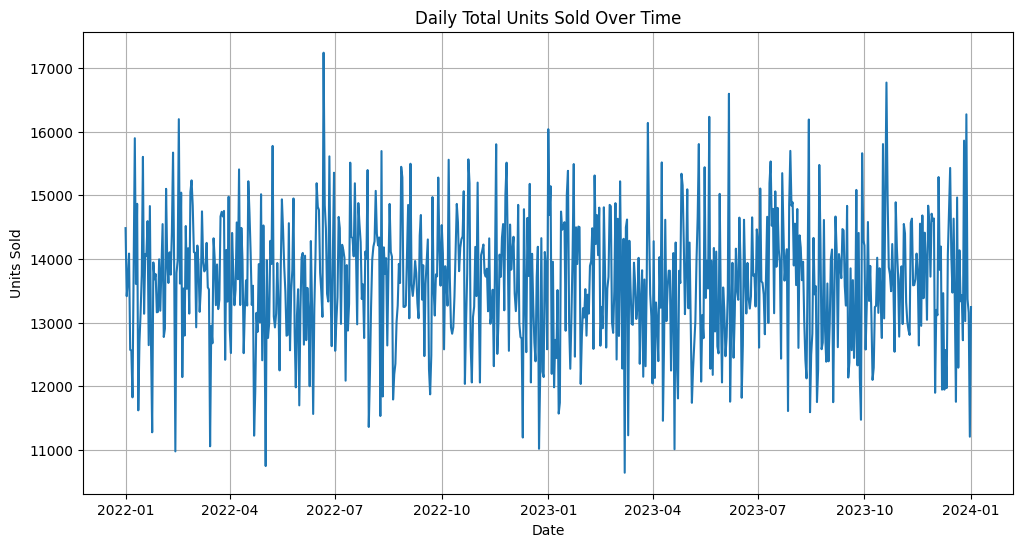

In [4]:
# Visualization 2: Time Trend
time_trend = df.groupby('Date')['Units Sold'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=time_trend, x='Date', y='Units Sold')
plt.title('Daily Total Units Sold Over Time')
plt.grid(True)
plt.savefig('sales_trend.png')

# Prep for Modeling: Feature Engineering
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Year'] = df['Date'].dt.year

# One-hot encoding for categorical variables
cat_cols = ['Category', 'Region', 'Weather Condition', 'Seasonality']
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Select features
# Dropping Store ID, Product ID, Date for the basic model, but in a real TS model these are key.
features = ['Inventory Level', 'Units Ordered', 'Demand Forecast', 'Price', 'Discount',
            'Holiday/Promotion', 'Competitor Pricing', 'Month', 'DayOfWeek', 'Year'] + \
           [col for col in df_encoded.columns if any(cat in col for cat in cat_cols)]

X = df_encoded[features]
y = df_encoded['Units Sold']

print("Features selected:", features)

/tmp/ipython-input-147287475.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=Weathercondition_sales.index, y=Weathercondition_sales.values, palette='magma')


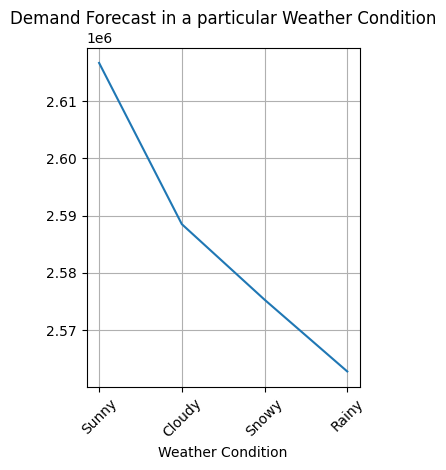

In [5]:
Weathercondition_sales = df.groupby('Weather Condition')['Demand Forecast'].sum().sort_values(ascending=False)

#visualization 3 according to Weather Conditions
plt.subplot(1,2,2)
sns.lineplot(x=Weathercondition_sales.index, y=Weathercondition_sales.values, palette='magma')
plt.title('Demand Forecast in a particular Weather Condition')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('category_region_sales.png')

Train set size: (58480, 23), Test set size: (14620, 23)
RMSE: 8.6111
R2 Score: 0.9937
Training Time: 60.67 seconds


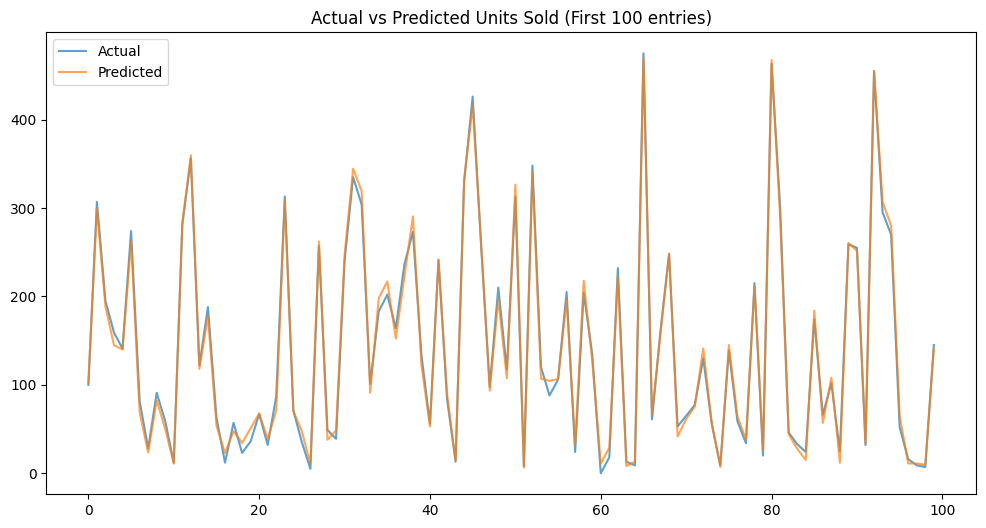

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import time

# Time Series Split: Sort by date
df_sorted = df_encoded.sort_values('Date')

# Define target and features
y = df_sorted['Units Sold']
X = df_sorted[features]

# Split into 80% train and 20% test (chronological)
split_idx = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

print(f"Train set size: {X_train.shape}, Test set size: {X_test.shape}")

# Model Training (Random Forest)
start_time = time.time()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
end_time = time.time()

# Model Selection: We chose Random Forest due to its ability to handle non-linearity and tabular features effectively.

# Prediction
y_pred = rf_model.predict(X_test)

# Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")
print(f"Training Time: {end_time - start_time:.2f} seconds")

# Visualization 4: Actual vs Predicted (Sample for clarity)
plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:100], label='Actual', alpha=0.7)
plt.plot(y_pred[:100], label='Predicted', alpha=0.7)
plt.title('Actual vs Predicted Units Sold (First 100 entries)')
plt.legend()
plt.savefig('actual_vs_predicted.png')

In [7]:
#Stock sufficiency check

#Inventory Level per store, per product
inventory_per_store = (
    df.groupby(['Store ID', 'Product ID'])['Inventory Level']
      .last()
      .reset_index()
)

#Demand Forecat per store, per product
forecast_demand = (
    df.groupby(['Store ID', 'Product ID'])['Demand Forecast']
      .mean()
      .reset_index()
)

#Merging results
inventory_check = inventory_per_store.merge(
    forecast_demand,
    on=['Store ID', 'Product ID']
)

#Logic - if inventory level is greater than demand forecast, stock is sufficient
inventory_check['stock_sufficient'] = (inventory_check['Inventory Level'] >= inventory_check['Demand Forecast'])


# Quantity to cover up demand
inventory_check['shortage_qty'] = (inventory_check['Demand Forecast'] - inventory_check['Inventory Level']).clip(lower=0)

print(inventory_check.head())


  Store ID Product ID  Inventory Level  Demand Forecast  stock_sufficient  \
0     S001      P0001              223       143.063187              True   
1     S001      P0002              217       136.417538              True   
2     S001      P0003               69       146.561204             False   
3     S001      P0004              338       146.057196              True   
4     S001      P0005              471       138.232791              True   

   shortage_qty  
0      0.000000  
1      0.000000  
2     77.561204  
3      0.000000  
4      0.000000  


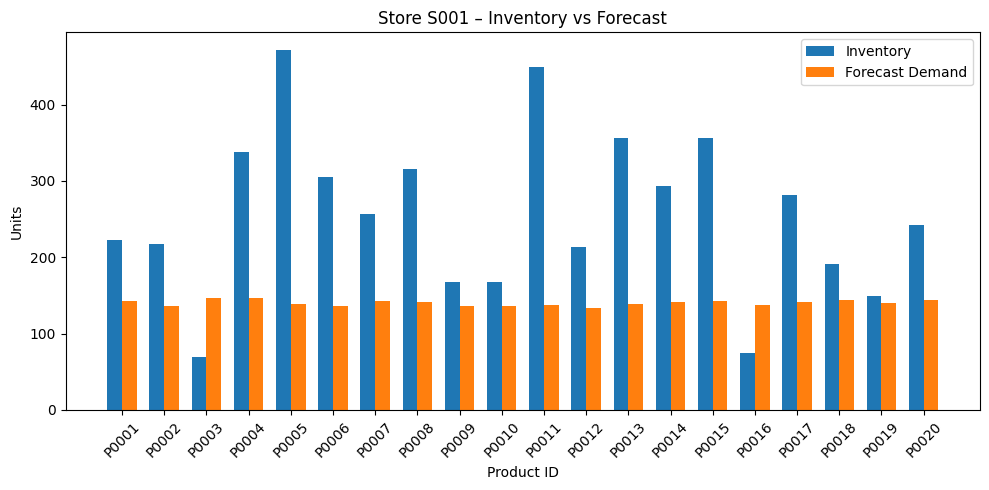

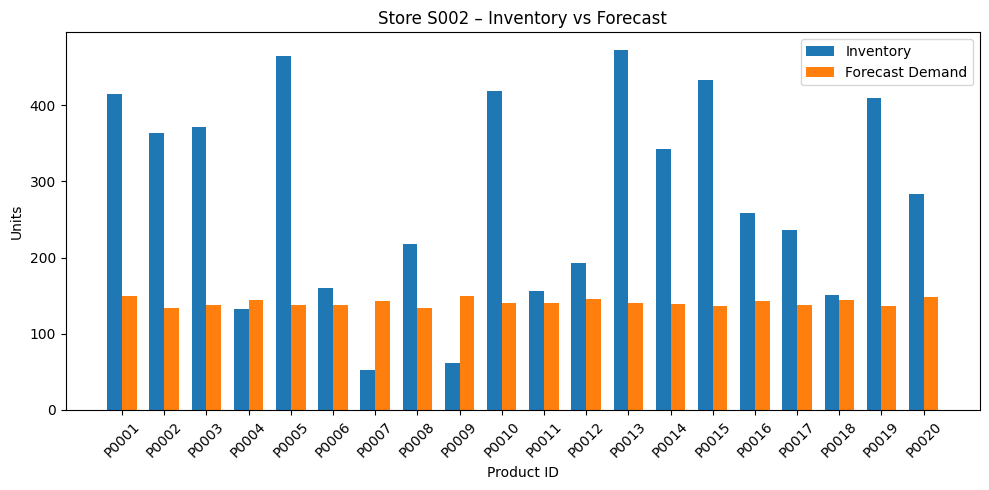

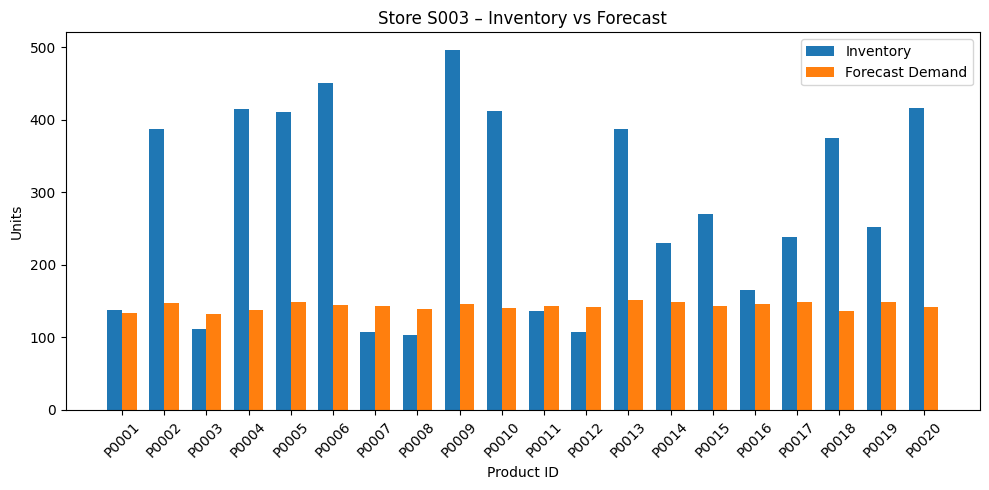

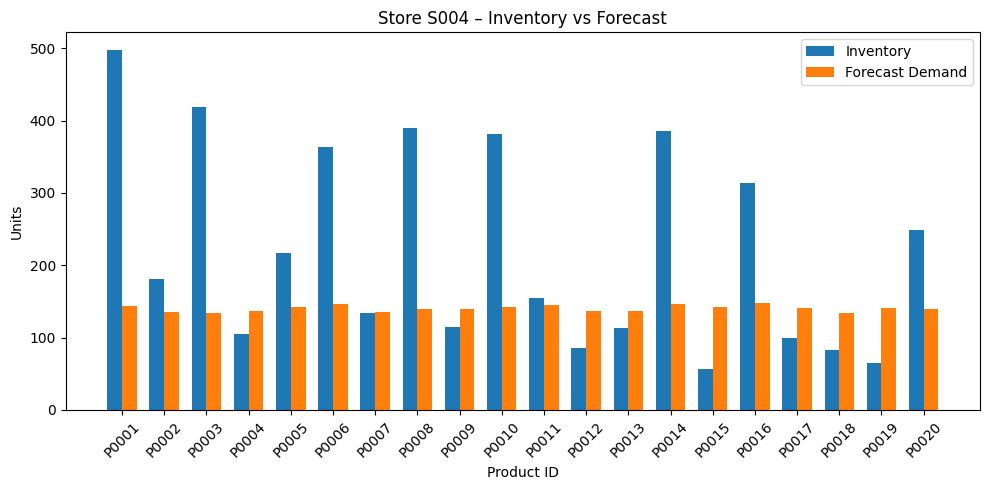

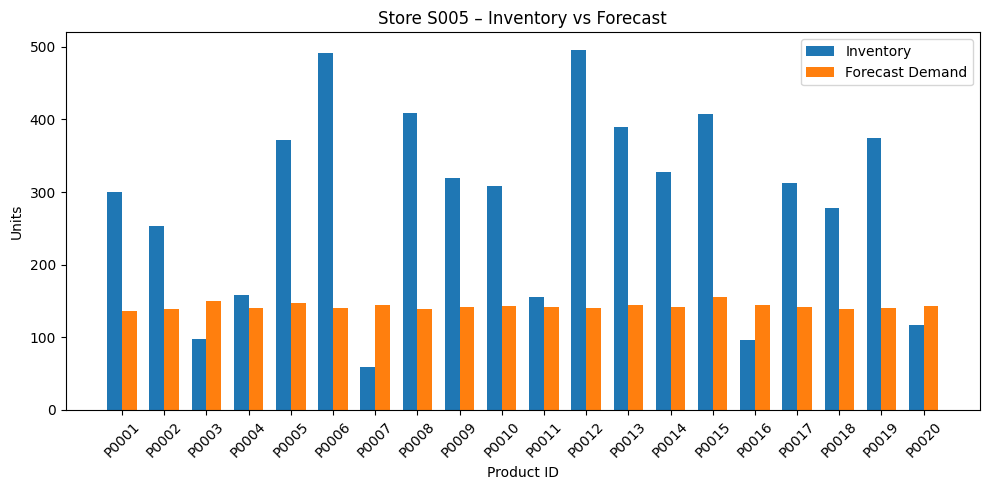

In [8]:
# Plot per store
stores = inventory_check['Store ID'].unique()

for store in stores:
    store_data = inventory_check[inventory_check['Store ID'] == store]

    x = np.arange(len(store_data['Product ID']))
    width = 0.35

    plt.figure(figsize=(10, 5))

    plt.bar(x - width/2, store_data['Inventory Level'], width, label='Inventory')
    plt.bar(x + width/2, store_data['Demand Forecast'], width, label='Forecast Demand')

    plt.xticks(x, store_data['Product ID'], rotation=45)
    plt.title(f'Store {store} – Inventory vs Forecast')
    plt.ylabel('Units')
    plt.xlabel('Product ID')
    plt.legend()

    plt.tight_layout()
    plt.show()